# What we may learn in this section?
- How to define and train the standalone discriminator model for learning the difference between real and fake images
- How to define the standalone generator model and train the composite generator and discriminator model.
- How to evaluate the performance of the GAN and use the final standalone generator model to generate new images.


#### Learning Resource --> https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

In [1]:
#add imports
from keras.datasets.mnist import load_data
#loading the images 
(xtrain,ytrain),(xtest,ytest) = load_data()

print("Train set: {}, {}".format(xtrain.shape,ytrain.shape))
print("Test set: {}, {}".format(xtest.shape,ytest.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train set: (60000, 28, 28), (60000,)
Test set: (10000, 28, 28), (10000,)


## Plotting A Single Image

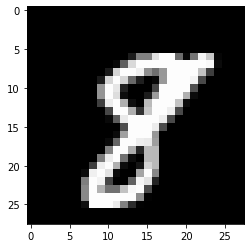

In [2]:
import matplotlib.pyplot as plt 
plt.imshow(xtrain[55],cmap = 'gray')

## Reversing the Image Color

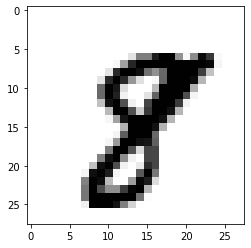

In [3]:
#reversing the image
plt.imshow(xtrain[55],cmap = 'gray_r')

## Plotting 25 Images

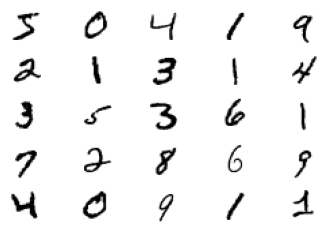

In [4]:

for i in range(25):
  #defining the subplot 
  plt.subplot(5,5,i+1)

  #turning of the axis 
  plt.axis('off')
  plt.imshow(xtrain[i],cmap='gray_r')

# Defining the Discriminnator Model

In [13]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU
from tensorflow.keras.utils import plot_model 
def Discriminator(input_shape = (28,28,1)):
  model = Sequential()
  model.add(Conv2D(64,(3,3),strides = (2,2),padding='same',input_shape=input_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1,activation='sigmoid'))

  #model compilation
  optimizer = Adam(lr=0.0002, beta_1=0.5)  
  model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics = ['accuracy'])
  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


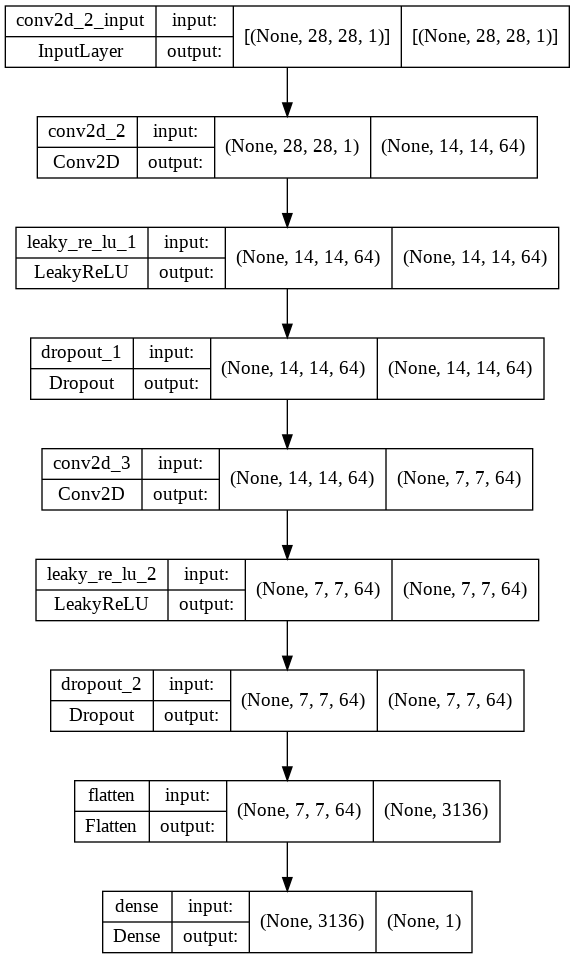

In [14]:
model = Discriminator()
model.summary()
plot_model(model,to_file='plot_discriminator.png',show_shapes=True,show_layer_names=True)